In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

In [229]:


data = pd.read_csv('movies_data.csv')
raw_data = data.drop_duplicates()

print("=== Data Info ===")
display(raw_data.info())

print("\n=== Descriptive Statistics ===")
display(raw_data.describe())

print("\n=== First 5 Rows ===")
display(raw_data.head())


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9014 entries, 0 to 9013
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9014 non-null   int64  
 1   imdb_id                8973 non-null   object 
 2   title                  9014 non-null   object 
 3   original_title         9014 non-null   object 
 4   overview               9002 non-null   object 
 5   tagline                7672 non-null   object 
 6   status                 9014 non-null   object 
 7   runtime                9014 non-null   int64  
 8   release_date           9010 non-null   object 
 9   budget                 9014 non-null   int64  
 10  revenue                9014 non-null   int64  
 11  popularity             9014 non-null   float64
 12  vote_average           9014 non-null   float64
 13  vote_count             9014 non-null   int64  
 14  genres                 8985 non-null  

None


=== Descriptive Statistics ===


,id,runtime,budget,revenue,popularity,vote_average,vote_count
count,9014.000000,9014.000000,9.014000e+03,9.014000e+03,9014.000000,9014.000000,9014.000000
mean,60112.407034,108.101287,2.261380e+07,6.270756e+07,4.330327,6.271719,1637.752052
std,84235.470113,22.740556,3.532742e+07,1.479606e+08,6.948695,1.060443,3256.379379
min,5.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,9916.750000,94.000000,2.519250e+06,2.362750e+06,1.516925,5.800000,96.000000
50%,20717.500000,104.000000,1.000000e+07,1.322522e+07,2.885000,6.361000,446.500000
75%,68736.500000,118.000000,2.600000e+07,5.520000e+07,5.091750,6.931000,1613.500000
max,334543.000000,339.000000,4.600000e+08,2.923706e+09,390.447100,10.000000,37385.000000



=== First 5 Rows ===


,id,imdb_id,title,original_title,overview,tagline,status,runtime,release_date,budget,...,genres,production_companies,production_countries,spoken_languages,homepage,adult,original_language,belongs_to_collection,poster_path,backdrop_path
0,5,tt0113101,Four Rooms,Four Rooms,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,Released,98,1995-12-09,4000000,...,"Comedy, Crime","Miramax, A Band Apart",United States of America,English,https://www.miramax.com/movie/four-rooms/,False,en,NaN,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,/f2t4JbUvQIjUF5FstG1zZFAp02N.jpg
1,6,tt0107286,Judgment Night,Judgment Night,"Four young friends, while taking a shortcut en...",Don't move. Don't whisper. Don't even breathe.,Released,109,1993-10-15,21000000,...,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,NaN,False,en,NaN,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,/iUUpKunmBN5l8goObADBaFHnxQ8.jpg
2,11,tt0076759,Star Wars,Star Wars,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...",Released,121,1977-05-25,11000000,...,"Adventure, Action, Science Fiction","Lucasfilm Ltd., 20th Century Fox",United States of America,English,http://www.starwars.com/films/star-wars-episod...,False,en,Star Wars Collection,/6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg,/2w4xG178RpB4MDAIfTkqAuSJzec.jpg
3,12,tt0266543,Finding Nemo,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",There are 3.7 trillion fish in the ocean. They...,Released,100,2003-05-30,94000000,...,"Animation, Family",Pixar,United States of America,English,http://movies.disney.com/finding-nemo,False,en,Finding Nemo Collection,/eHuGQ10FUzK1mdOY69wF5pGgEf5.jpg,/eCynaAOgYYiw5yN5lBwz3IxqvaW.jpg
4,13,tt0109830,Forrest Gump,Forrest Gump,A man with a low IQ has accomplished great thi...,The world will never be the same once you've s...,Released,142,1994-06-23,55000000,...,"Comedy, Drama, Romance","Paramount Pictures, The Steve Tisch Company, W...",United States of America,English,https://www.paramountmovies.com/movies/forrest...,False,en,NaN,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg,/ghgfzbEV7kbpbi1O8eIILKVXEA8.jpg


### Removing Unnecessery features

In [230]:
data = raw_data.copy()
data.drop(columns=['overview', 'tagline', 'id', 'imdb_id', 'backdrop_path', 'poster_path', 'homepage' ], inplace=True, axis=1)

### Manipulating existed data

In [231]:
data['belongs_to_collection'] = data['belongs_to_collection'].apply(lambda x: False if pd.isna(x) else True)
data['title_changed'] = data['original_title'] != data['title']
data.drop(columns=['original_title', 'title'], inplace=True, axis=1)
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y-%m-%d', errors='coerce')

### Exploring verity

In [232]:
display(data["status"].value_counts())
display(data["vote_average"].value_counts())
display(data["spoken_languages"].value_counts())
display(data["runtime"].value_counts())
display(data["production_companies"].value_counts())
display(data["production_countries"].value_counts())
display(data["genres"].value_counts())

status
Released    9014
Name: count, dtype: int64

vote_average
6.000    186
6.300    179
6.200    177
6.500    170
6.100    168
        ... 
7.031      1
7.329      1
6.442      1
6.505      1
7.497      1
Name: count, Length: 2570, dtype: int64

spoken_languages
English                              5265
English, Spanish                      254
Hindi                                 169
English, French                       163
French                                135
                                     ... 
English, Spanish, French, Italian       1
English, Arabic, German                 1
English, Japanese, German               1
Spanish, English, Arabic                1
Somali, English                         1
Name: count, Length: 950, dtype: int64

runtime
90     264
100    253
97     238
95     230
105    227
      ... 
225      1
251      1
223      1
220      1
27       1
Name: count, Length: 193, dtype: int64

production_companies
Metro-Goldwyn-Mayer                                                                                                                                                                                             179
Paramount Pictures                                                                                                                                                                                              109
20th Century Fox                                                                                                                                                                                                 95
Warner Bros. Pictures                                                                                                                                                                                            91
Universal Pictures                                                                                                                 

production_countries
United States of America                        4970
India                                            401
United Kingdom, United States of America         353
United Kingdom                                   189
France                                           138
                                                ... 
Netherlands, Spain, United States of America       1
Hong Kong, Taiwan                                  1
Italy, United Kingdom, France                      1
United Kingdom, Luxembourg                         1
Turkey, United States of America                   1
Name: count, Length: 841, dtype: int64

genres
Drama                                          586
Comedy                                         491
Drama, Romance                                 348
Comedy, Romance                                281
Comedy, Drama                                  266
                                              ... 
Fantasy, Comedy, Drama, Romance                  1
Adventure, Western, Comedy, Drama                1
Thriller, Mystery, Horror                        1
Crime, Romance, Drama, Thriller                  1
Animation, Adventure, Comedy, Family, Music      1
Name: count, Length: 1892, dtype: int64

##### vote_average - numeric: good
##### runtime - numeric: good
##### spoken_languages - cat-list: main lang is the first, leave main lang, add lang-count feature
##### production_countries - cat-list: main country is the first, leave country lang, add countries-count feature
##### genres - cat-list: can one-hot encode
##### production_companies - cat-list: too diverse and too much companies, budget is a good indicator for companie league  




#### As we can see we have fetures that can be removed right away like 'status' and with others we can make a one-hot encoder features form 'gnere', 'spoken_languages', 'production_companies' and 'production_countries'

In [233]:

# A function for main and count features for catagorical columns
    
def cat_list_comma_separated_column(df: pd.DataFrame, column_name: str, null_value: str = 'unknown') -> pd.DataFrame:
    df[column_name] = df[column_name].fillna(null_value)
    df[column_name] = df[column_name].apply(lambda x: [item.strip() for item in x.split(',') if item.strip()] 
                                          if x != null_value else [null_value])
    df["main_"+column_name] = df[column_name].apply(lambda x: x[0] if len(x) > 0 else null_value)
    df[column_name+"_count"] = df[column_name].apply(lambda x: len(x))
    df.drop(columns=[column_name], inplace=True, axis=1)
    df[column_name+"_count"] = df[column_name+"_count"].astype(np.int8)
    df["main_"+column_name] = df["main_"+column_name].astype('category')
    
    return df

In [234]:

# remove status and prod-companies column
data = data.drop(columns=['status'], axis=1)
data = data.drop(columns=['production_companies'], axis=1)

In [235]:
display(data["genres"].value_counts())

genres
Drama                                          586
Comedy                                         491
Drama, Romance                                 348
Comedy, Romance                                281
Comedy, Drama                                  266
                                              ... 
Fantasy, Comedy, Drama, Romance                  1
Adventure, Western, Comedy, Drama                1
Thriller, Mystery, Horror                        1
Crime, Romance, Drama, Thriller                  1
Animation, Adventure, Comedy, Family, Music      1
Name: count, Length: 1892, dtype: int64

In [236]:
from sklearn.preprocessing import MultiLabelBinarizer
data['genres'] = data['genres'].fillna('unknown')
data['genres'] = data['genres'].apply(lambda x: [item.strip() for item in x.split(', ') if item.strip()] 
                                          if x != 'unknown' else ['unknown'])
# one-hot encoding for genres:
mlb = MultiLabelBinarizer()
encoded = pd.DataFrame(
        mlb.fit_transform(data['genres']),
        columns=[f'genres_{val}' for val in mlb.classes_],
        index=data.index
    ).astype(bool)
data['genres'] = data['genres'].apply(lambda x: x[0] if len(x) > 0 else 'unknown')
data = pd.concat([data, encoded], axis=1)

In [237]:
#changing the cat-list columns 
data = cat_list_comma_separated_column(data, 'production_countries')
data = cat_list_comma_separated_column(data, 'spoken_languages')

In [238]:
#new features based on release date
data['release_year'] = data['release_date'].dt.year
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
data['Season'] = data['release_date'].apply(lambda x: season_dict[x.month] if pd.notnull(x) else 'unknown').astype('category')
numerical_features = ['vote_count', 'vote_average','popularity','revenue','budget', 'runtime']
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9014 entries, 0 to 9013
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   runtime                     9014 non-null   int64         
 1   release_date                9010 non-null   datetime64[ns]
 2   budget                      9014 non-null   int64         
 3   revenue                     9014 non-null   int64         
 4   popularity                  9014 non-null   float64       
 5   vote_average                9014 non-null   float64       
 6   vote_count                  9014 non-null   int64         
 7   genres                      9014 non-null   object        
 8   adult                       9014 non-null   bool          
 9   original_language           9014 non-null   object        
 10  belongs_to_collection       9014 non-null   bool          
 11  title_changed               9014 non-null   bool        

None

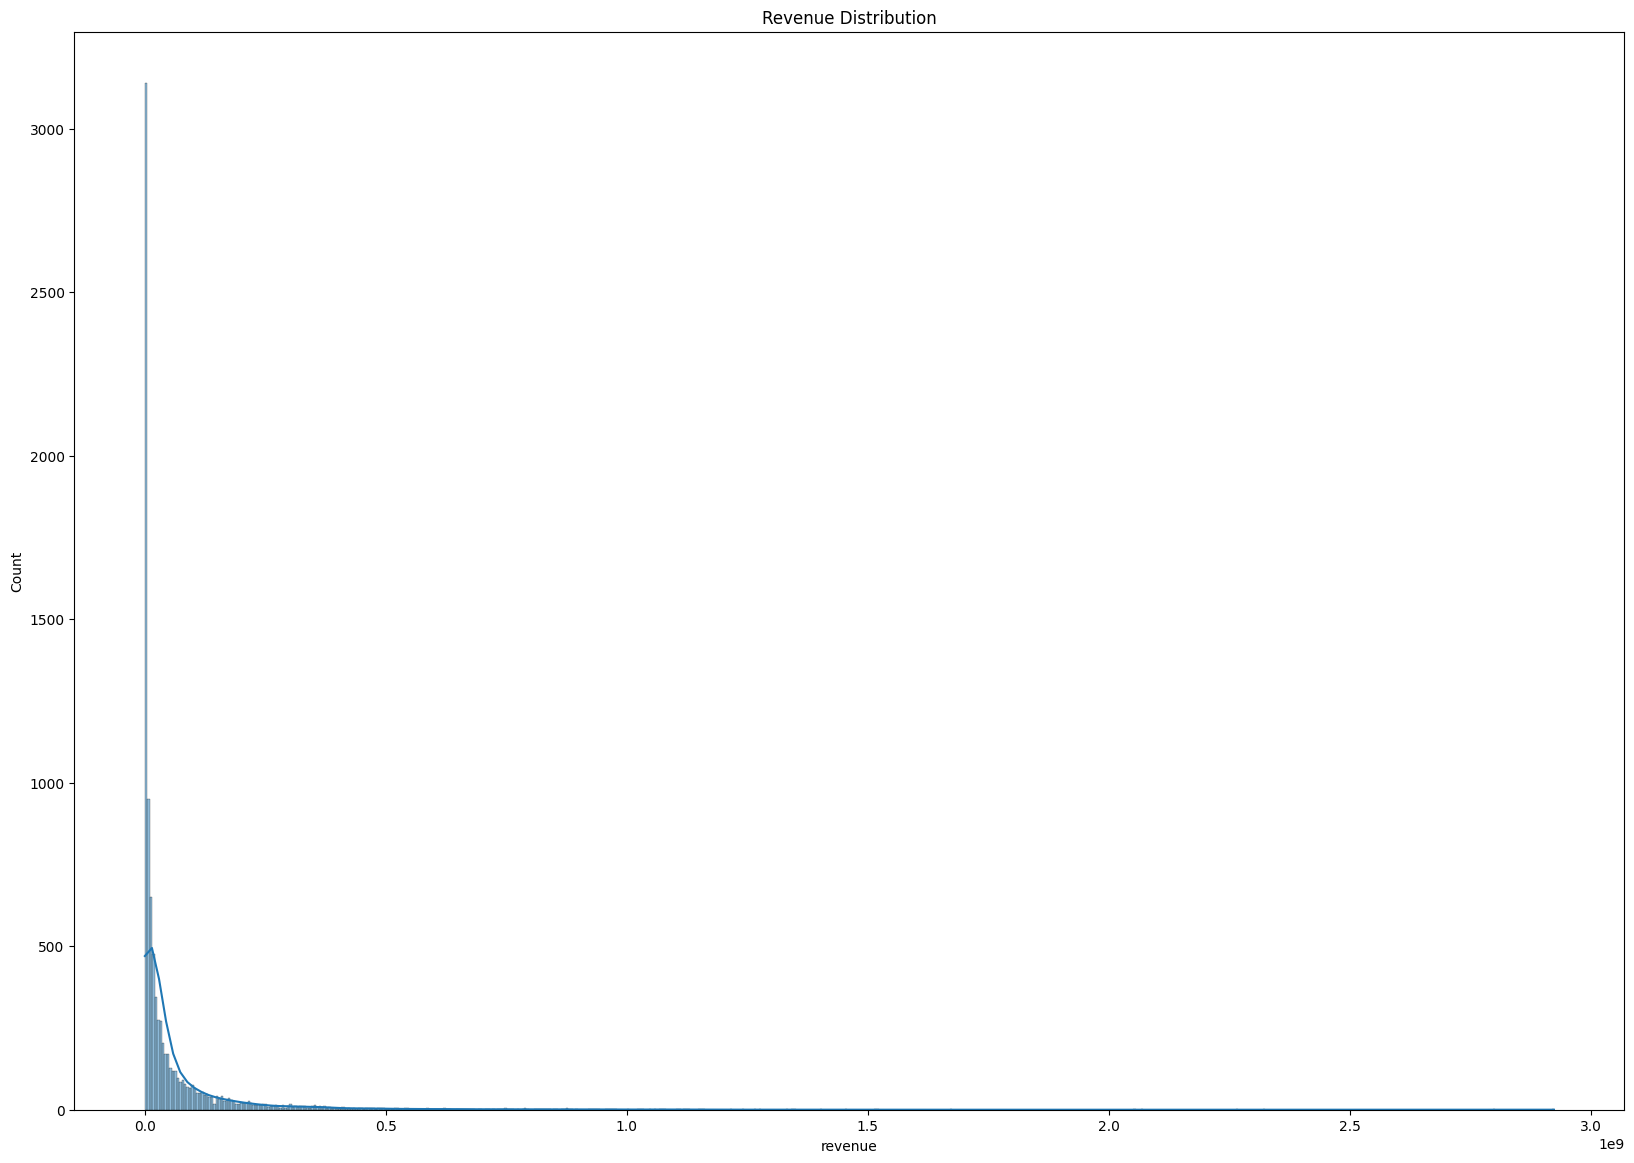

In [239]:
plt.figure(figsize=(20, 14))
plt.title('Revenue Distribution')
plot1 = sns.histplot(data['revenue'], kde=True)

#### lets remove stattistic annomallies

In [240]:
# Compute IQR
Q1 = data["revenue"].quantile(0.25)
Q3 = data["revenue"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find anomalies
anomaly_iqr = data[(data["revenue"] < lower_bound) | (data["revenue"] > upper_bound)]
print(f"Detected {len(anomaly_iqr)} anomalies using IQR")

Detected 1108 anomalies using IQR


In [241]:
# mahalanobis distance

# Select numerical features for multivariate analysis
features = ["revenue", "budget"]
data_selected = data[features]

# Compute covariance matrix & mean
cov_matrix = np.cov(data_selected, rowvar=False)
mean_vector = np.mean(data_selected, axis=0)
inv_cov_matrix = inv(cov_matrix)

# Compute Mahalanobis Distance for each point
data["Mahalanobis_Dist"] = data_selected.apply(lambda x: mahalanobis(x, mean_vector, inv_cov_matrix), axis=1)

# Define anomaly threshold (e.g., above 99th percentile)
threshold = np.percentile(data["Mahalanobis_Dist"], 80)
anomaly_mahalanobis = data[data["Mahalanobis_Dist"] > threshold]

print(f"Detected {len(anomaly_mahalanobis)} anomalies using Mahalanobis Distance")

Detected 1803 anomalies using Mahalanobis Distance


In [242]:
normal_data = data[(data["Mahalanobis_Dist"] <= threshold) & (data["revenue"] >= lower_bound) & (data["revenue"] <= upper_bound)]

<Axes: title={'center': 'Income Boxplot'}, xlabel='revenue'>

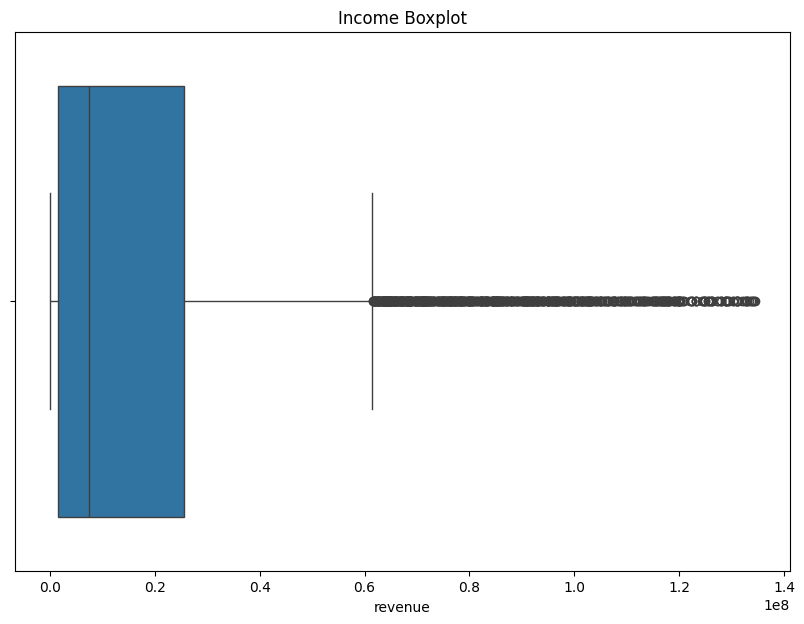

In [243]:
plt.figure(figsize=(10, 7))
plt.title('Income Boxplot')
sns.boxplot(x=normal_data['revenue'])

<Axes: title={'center': 'Correlation Heatmap'}>

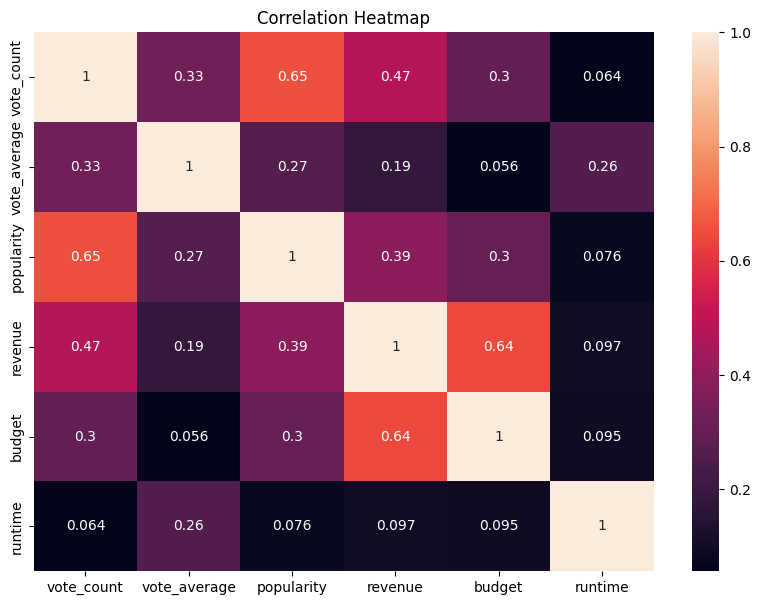

In [244]:
plt.figure(figsize=(10, 7))
plt.title('Correlation Heatmap')
sns.heatmap(normal_data[['vote_count', 'vote_average','popularity','revenue','budget', 'runtime']].corr(), annot=True)

<Axes: title={'center': 'Genre Distribution'}, xlabel='genres', ylabel='count'>

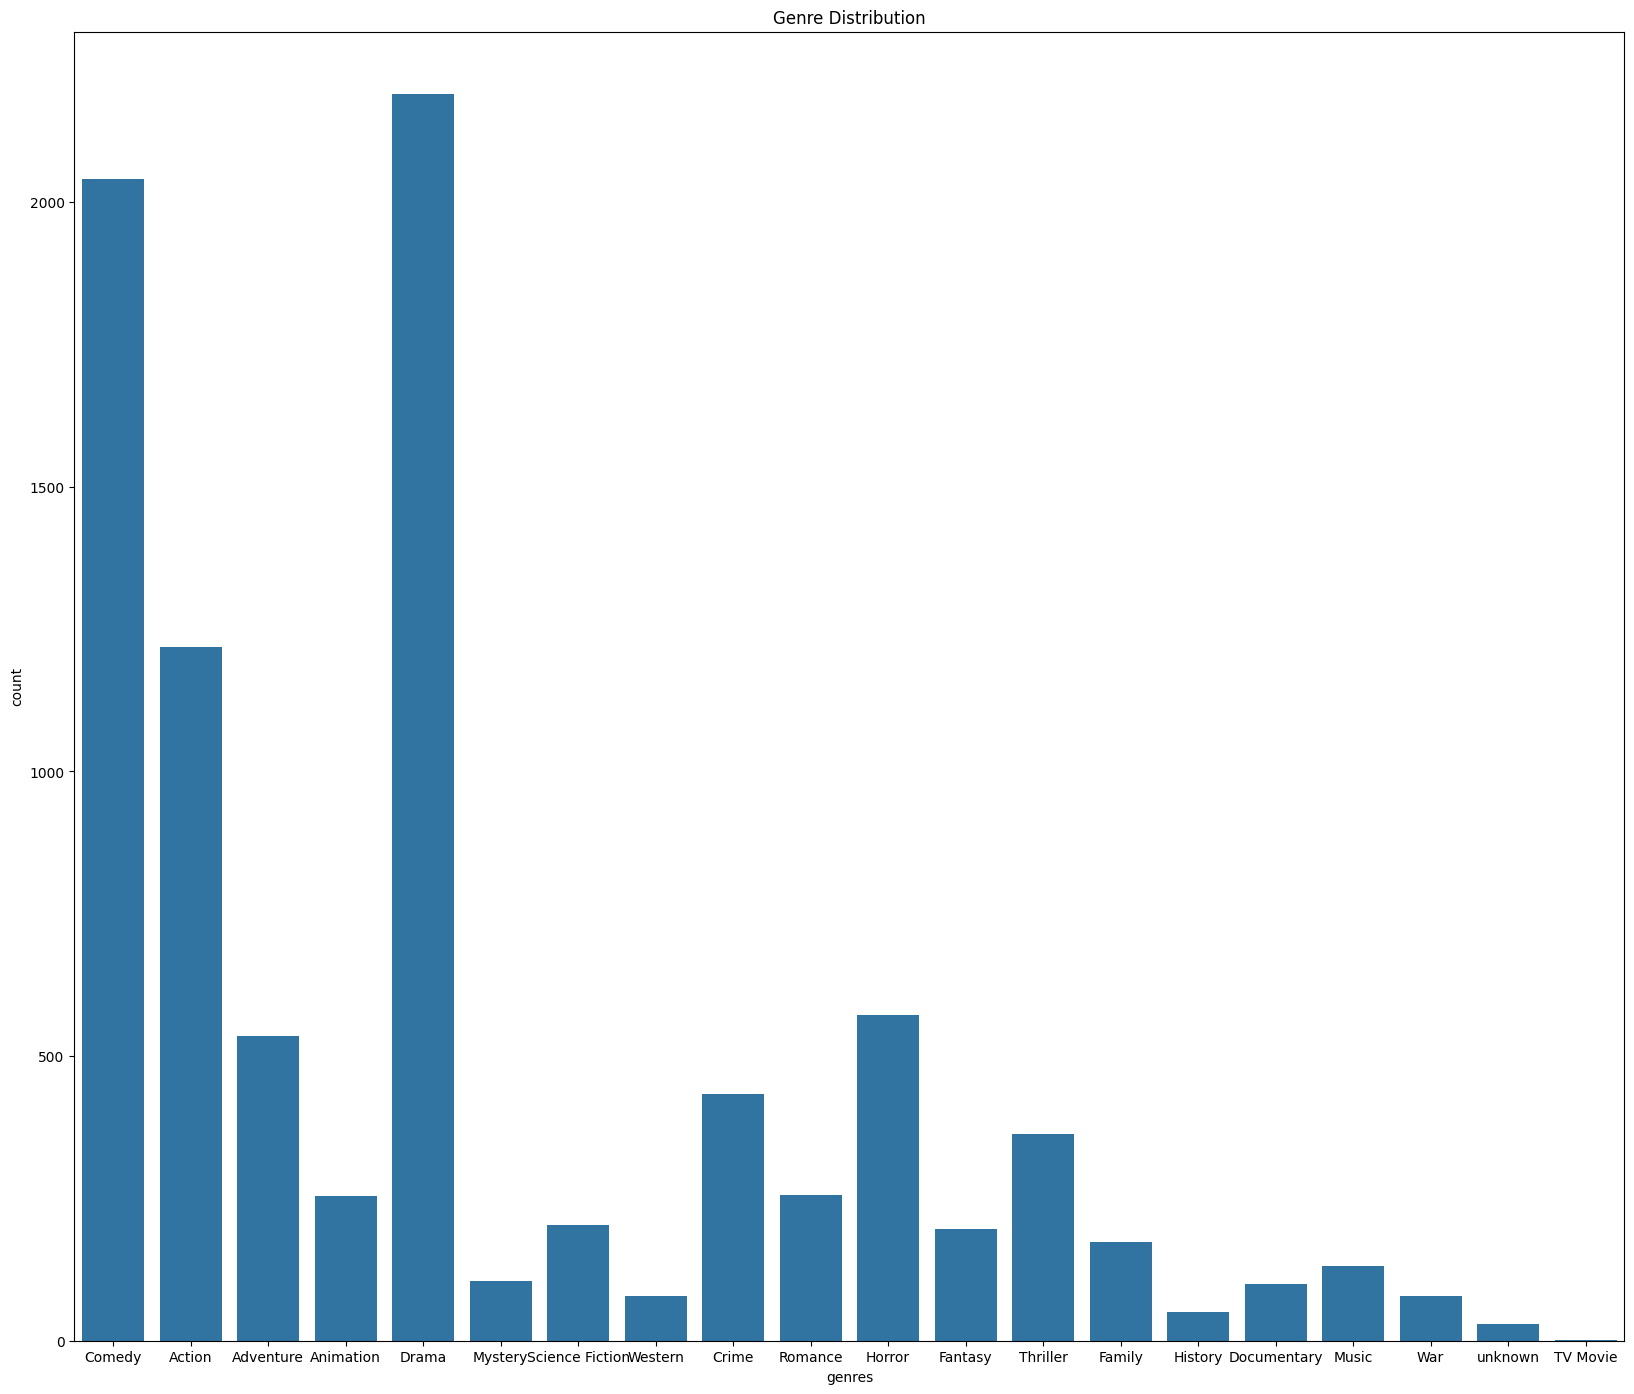

In [245]:
plt.figure(figsize=(20, 17))
plt.title('Genre Distribution')
sns.countplot(data, x='genres')

<Axes: title={'center': 'Revenue Distribution by Geners'}, xlabel='genres', ylabel='revenue'>

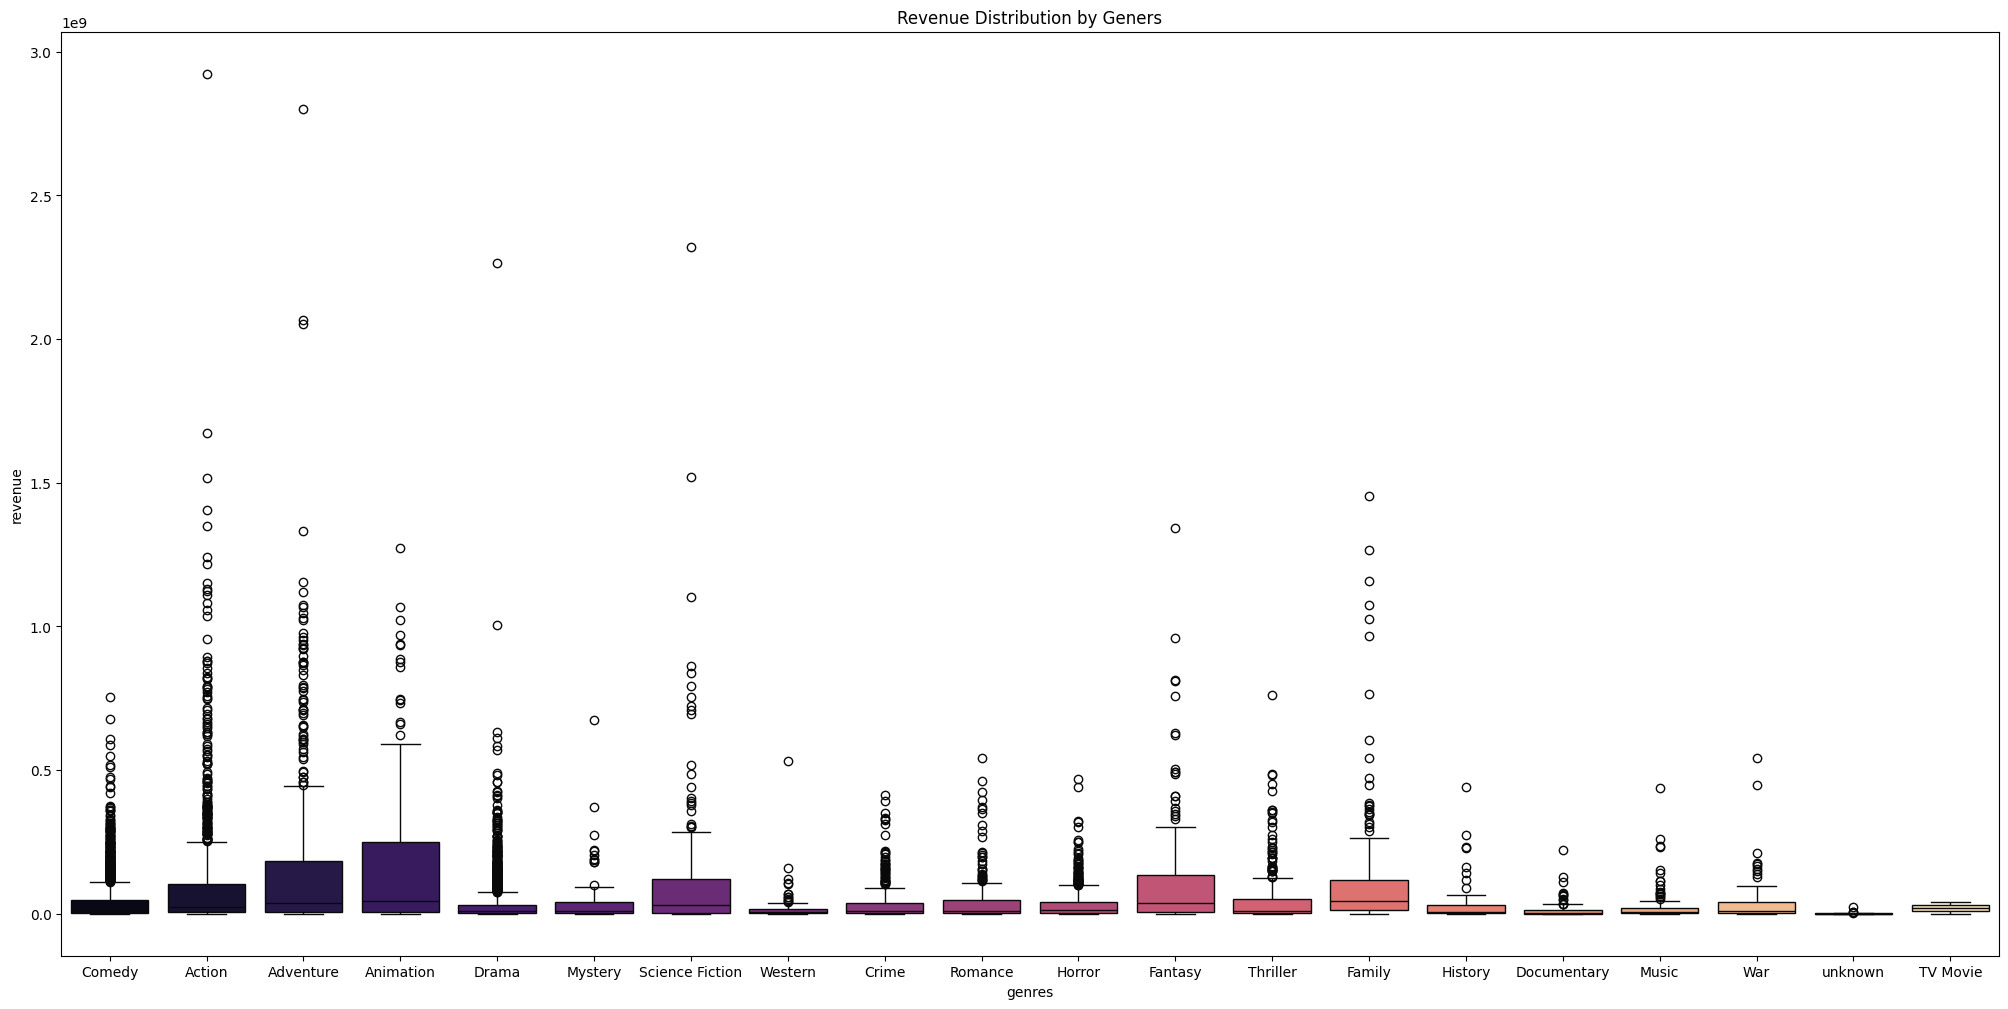

In [246]:
plt.figure(figsize=(25, 12))
plt.title('Revenue Distribution by Geners')
sns.boxplot(x='genres', y='revenue', data=data, palette="magma", hue="genres")

<Axes: title={'center': 'Budget Distribution by Geners'}, xlabel='genres', ylabel='budget'>

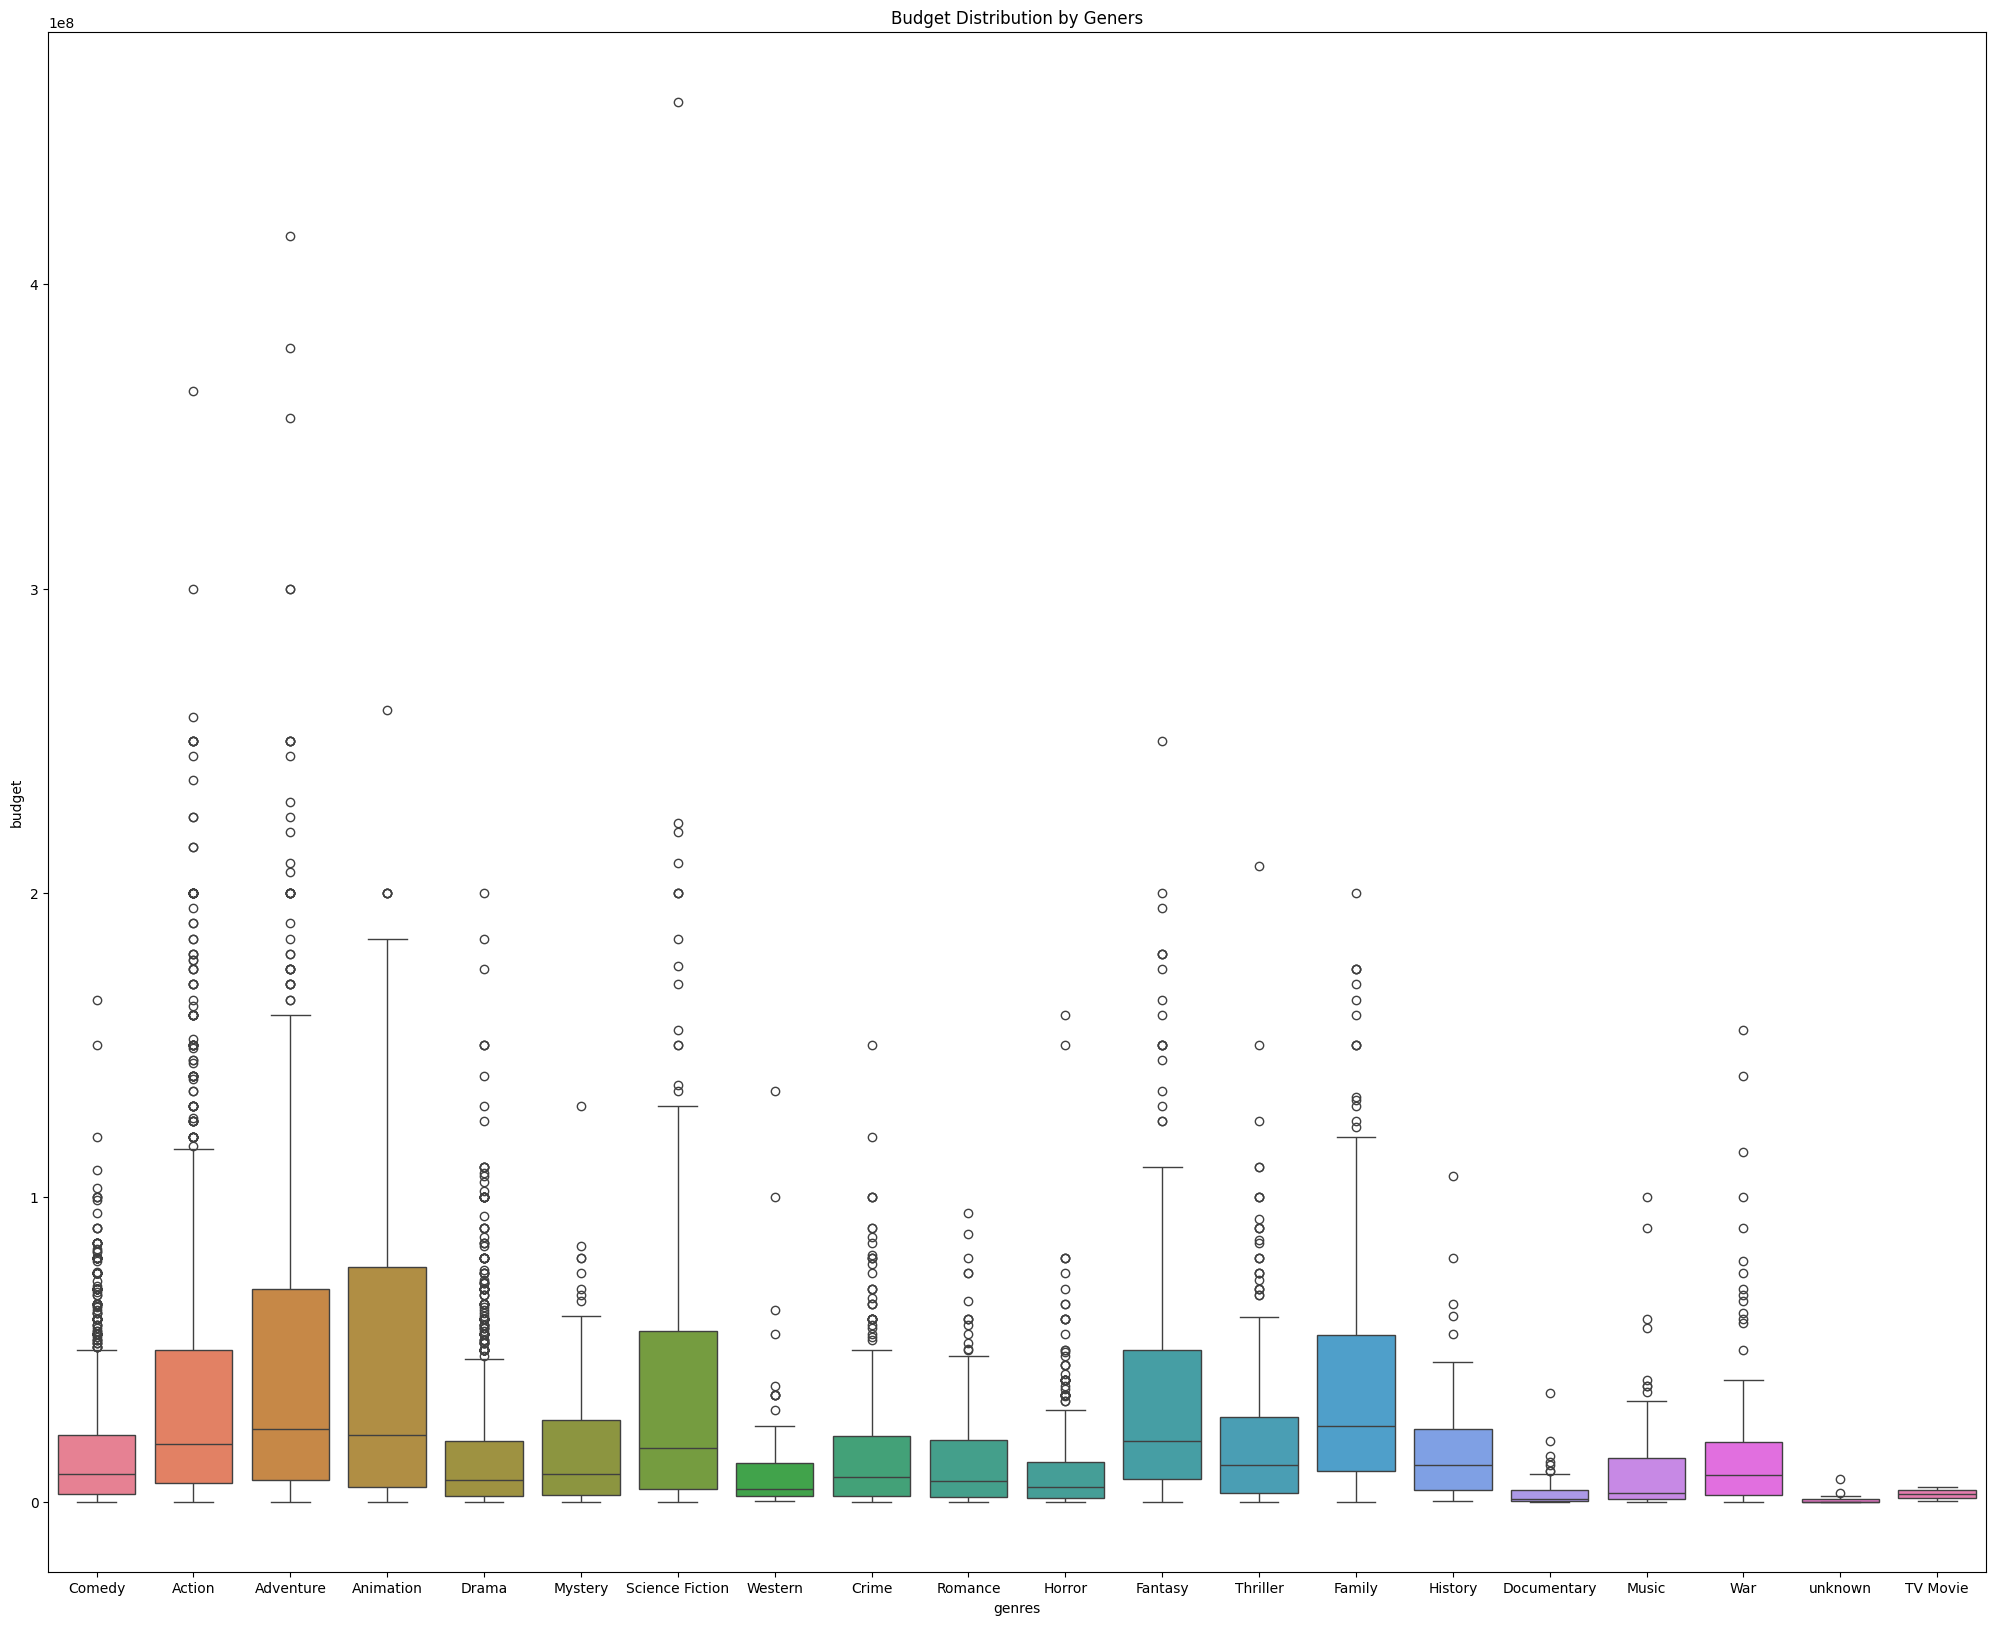

In [247]:
plt.figure(figsize=(25, 20))
plt.title('Budget Distribution by Geners')
sns.boxplot(x='genres', y='budget', data=data, palette="husl", hue="genres")

<Axes: title={'center': 'Popularity Distribution By Gender'}, xlabel='popularity', ylabel='budget'>

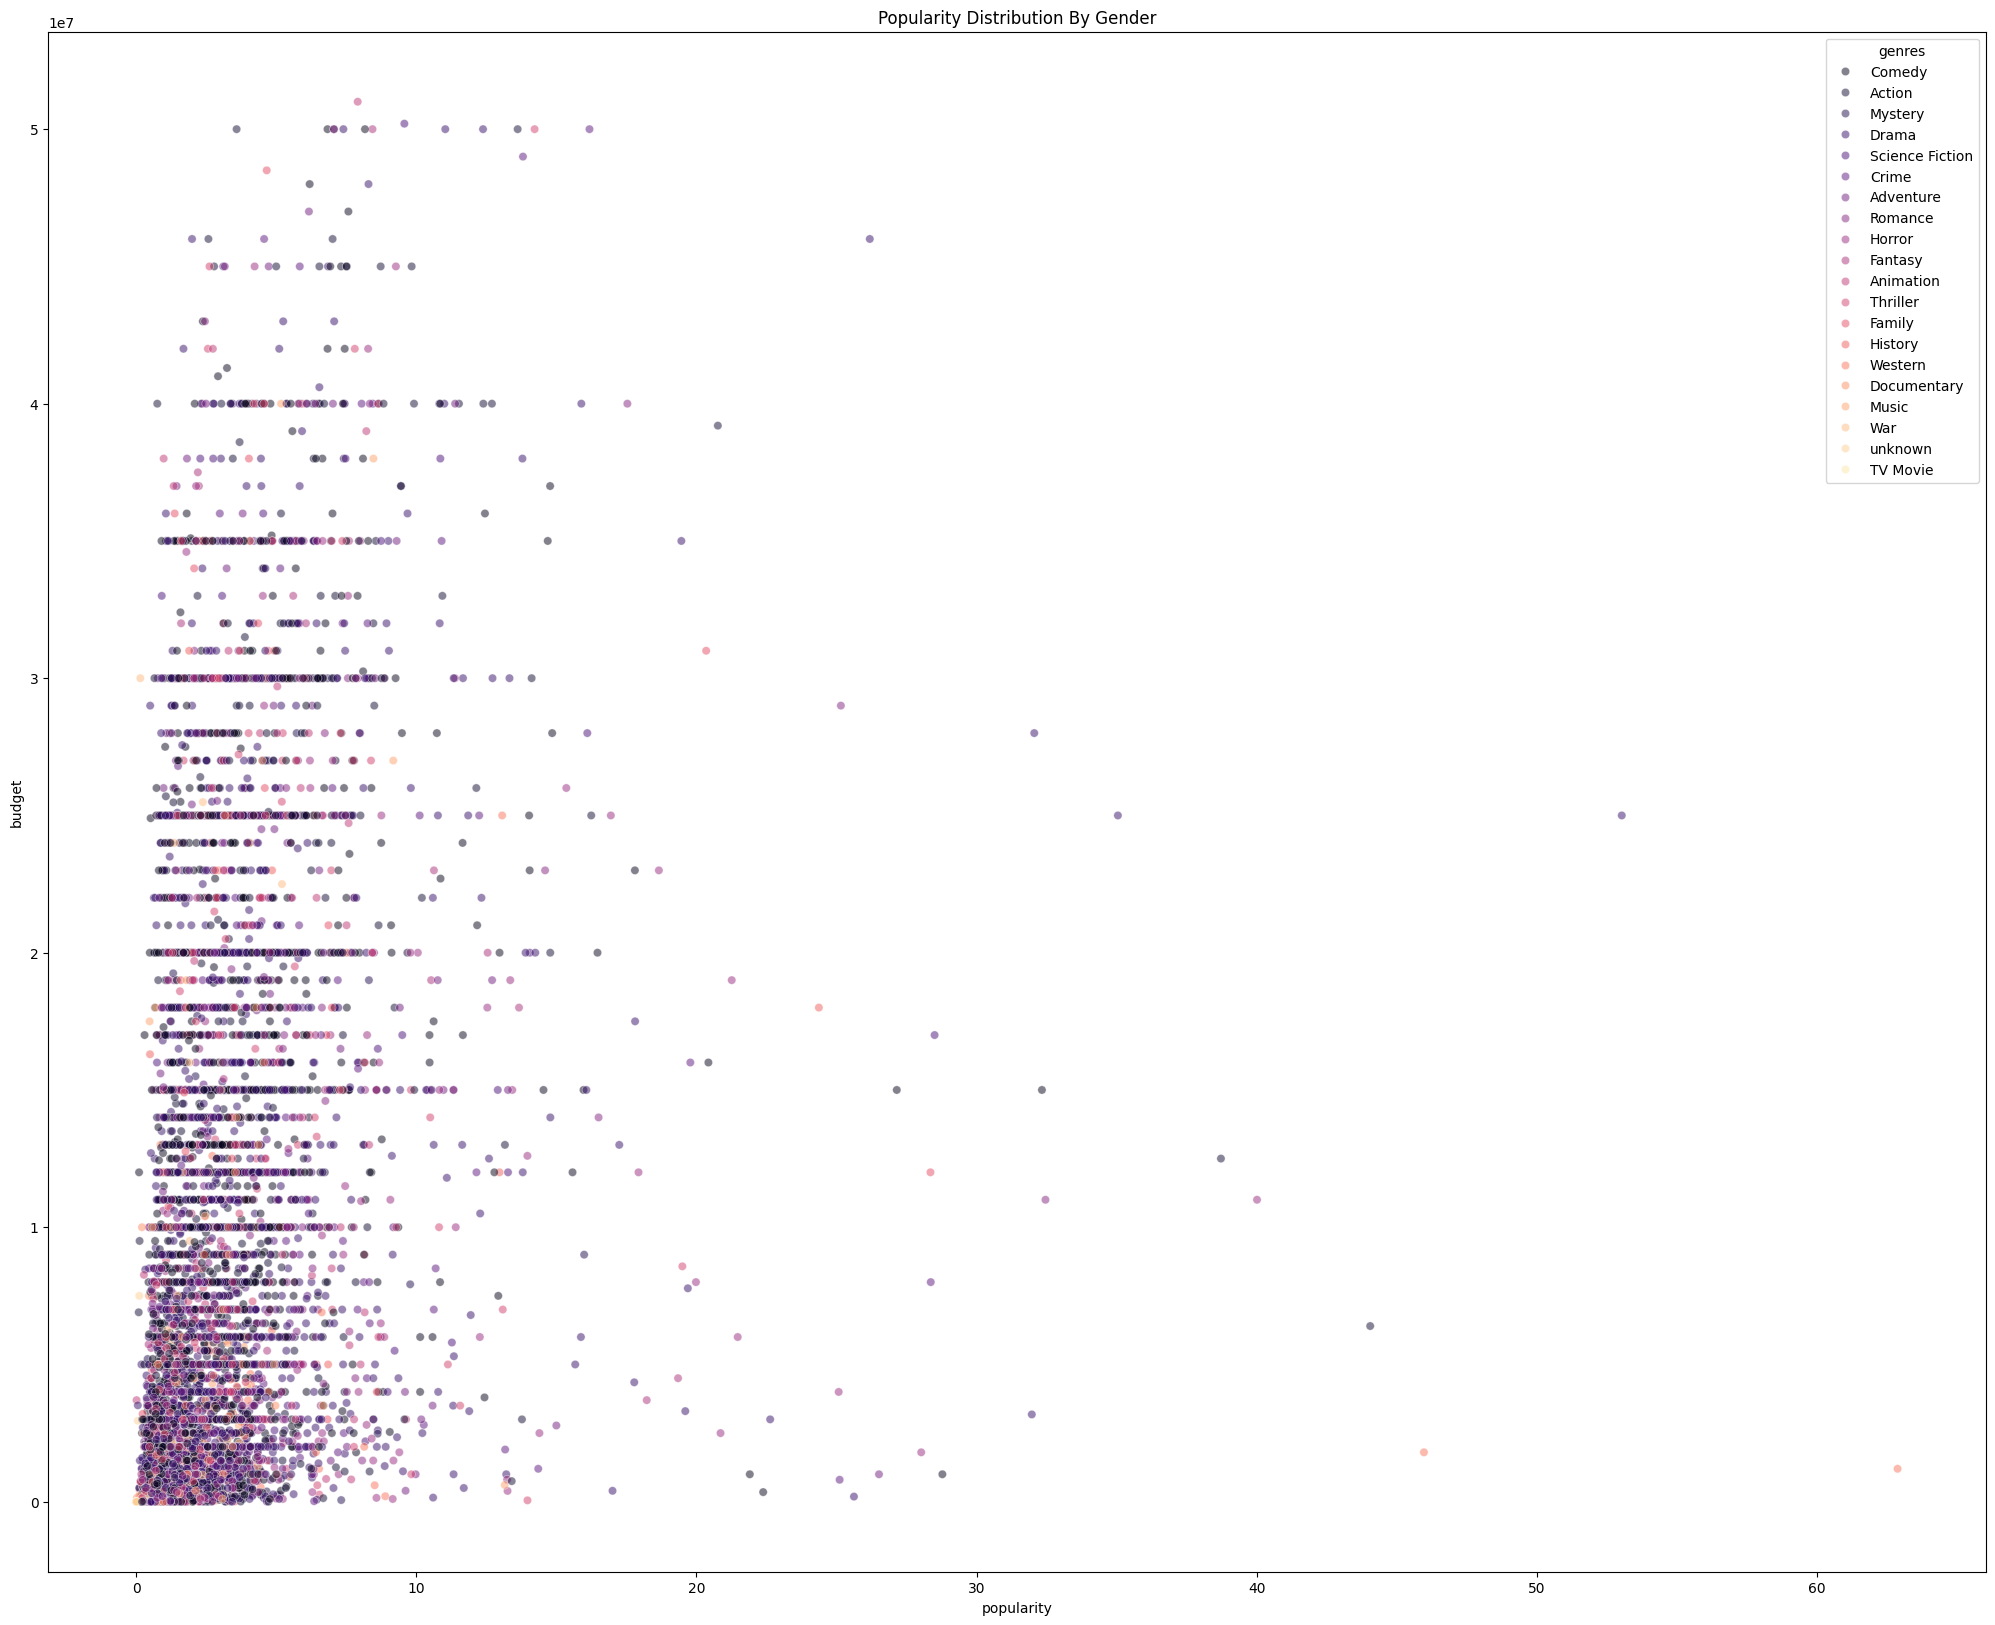

In [248]:
plt.figure(figsize=(25, 20))
plt.title('Popularity Distribution By Gender')
sns.scatterplot(normal_data, x="popularity", palette="magma", y="budget", hue="genres", alpha=0.5)


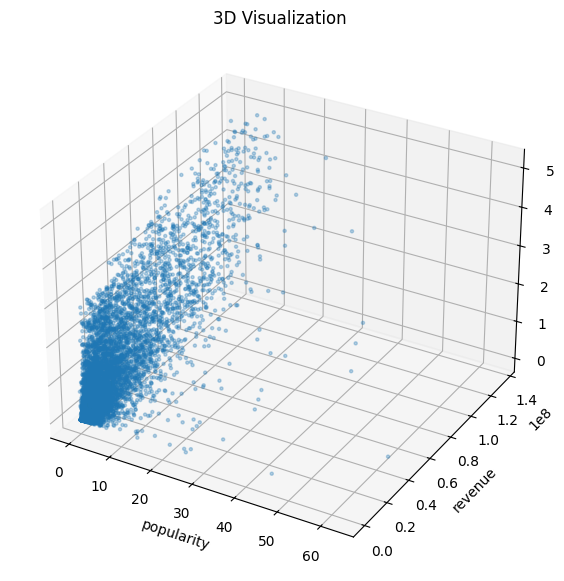

In [249]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal_data['popularity'], normal_data['revenue'], normal_data['budget'], alpha=0.3, s=5)

ax.set_xlabel("popularity")
ax.set_ylabel("revenue")
ax.set_zlabel("budget")
ax.set_title("3D Visualization")
plt.show()